In [6]:
import pandas as pd
import os
import numpy as np
import pickle
import scipy
import matplotlib.pyplot as plt
from skimage.measure import regionprops

import shap
from matplotlib.pyplot import text
import importlib
import figure4
importlib.reload(figure4)

<module 'figure4' from 'C:\\Users\\codyt\\Documents\\repos\\time-series-dc\\sklearn_models\\figure4.py'>

In [2]:
def filter_df(df, ymax=5, max_ar=1.05, radius_std=3):
    print('Length prefilter: ' + str(len(df)))
    y_hist = []
    for idx, row in df.iterrows():
        y = row.yc_um_el
        y_cav = y[row.cav_idx]
        y_avg = y_cav.mean()
        y_hist.append(y_avg)

    df = df[np.abs(y_hist) < ymax]

    # filter by area ratio
    area_ratio = []

    for idx, row in df.iterrows():
        area = row.area
        area_cx = row.area_cx
        area_ratio.append(np.all(area_cx / area < max_ar))

    df = df[area_ratio]

    # filter by radius
    r_var = np.var(df.rad)
    r_mean = np.mean(df.rad)
    df = df[(df.rad > r_mean - radius_std * r_var) & (df.rad < r_mean + radius_std * r_var)]

    print('Length postfilter: ' + str(len(df)))

    return df

In [8]:
df = pd.read_pickle('D://Datasets//FINAL_DF_light')
df['idx'] = range(len(df))
df = filter_df(df,ymax=5,max_ar=1.1,radius_std=3)
df = df[(df.cell=='hl60')|(df.cell=='hl60d')]
df = df[np.logical_not((df.cell=='hl60')&(df.date=='11-3-20')&(df.run=='0'))]
df = df[np.logical_not((df.cell=='hl60')&(df.date=='11-5-20')&(df.run=='3'))]
df.dropna(inplace=True)
print(len(df))

Length prefilter: 2337
Length postfilter: 1925
1500


In [ ]:
df

0.7422222222222222
0.8222222222222222
0.7866666666666666
0.8444444444444444


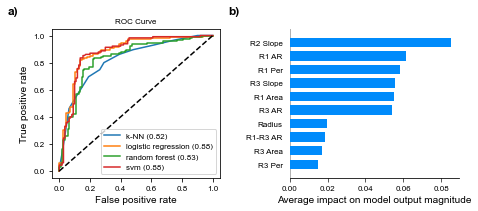

In [47]:
importlib.reload(figure4)
figure4.make_plot(df,save=True)